**ESDA**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import init_notebook_mode,iplot
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import re
from pandas.io.json import json_normalize
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
# Read data and assign NA to missing values 
crimedata= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                   sep='\s*,\s*',encoding='latin-1',engine='python', na_values=["?"])

crimedata.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
           'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
           'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
           'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
           'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
           'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
           'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
           'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
           'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
           'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
           'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
           'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
           'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
           'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
           'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
           'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
           'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
           'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
           'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
           'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

print(crimedata)

           communityname state  countyCode  communityCode  fold  population  \
0         Marpletownship    PA        45.0        47616.0     1       23123   
1             Tigardcity    OR         NaN            NaN     1       29344   
2       Gloversvillecity    NY        35.0        29443.0     1       16656   
3            Bemidjicity    MN         7.0         5068.0     1       11245   
4        Springfieldcity    MO         NaN            NaN     1      140494   
...                  ...   ...         ...            ...   ...         ...   
2209          Mercedcity    CA         NaN            NaN    10       56216   
2210       Pinevillecity    LA         NaN            NaN    10       12251   
2211         Yucaipacity    CA         NaN            NaN    10       32824   
2212        Beevillecity    TX         NaN            NaN    10       13547   
2213  WestSacramentocity    CA         NaN            NaN    10       28898   

      householdsize  racepctblack  racePctWhite  ra

In [3]:
crimedata.describe()

countyCode  communityCode         fold    population  householdsize  \
count  993.000000     990.000000  2214.000000  2.214000e+03    2214.000000   
mean    65.614300   45249.543434     5.496387  5.313657e+04       2.707150   
std    117.887749   25407.038920     2.871984  2.046646e+05       0.334091   
min      1.000000      70.000000     1.000000  1.000500e+04       1.600000   
25%     11.000000   22970.000000     3.000000  1.437125e+04       2.500000   
50%     27.000000   46983.500000     5.000000  2.280300e+04       2.660000   
75%     81.000000   65812.500000     8.000000  4.304350e+04       2.850000   
max    840.000000   94597.000000    10.000000  7.322564e+06       5.280000   

       racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  \
count   2214.000000   2214.000000   2214.000000  2214.000000  2214.000000   
mean       9.338699     83.976296      2.668473     7.952918    14.446730   
std       14.249369     16.421952      4.474113    14.592557     4.519448   
min        0.000000      2.680000      0.030000     0.120000     4.580000   
25%        0.860000     76.310000      0.620000     0.930000    12.250000   
50%        2.870000     90.350000      1.230000     2.180000    13.620000   
75%       11.157500     96.227500      2.670000     7.810000    15.360000   
max       96.670000     99.630000     57.460000    95.290000    54.400000   

       ...    burglaries   burglPerPop      larcenies    larcPerPop  \
count  ...   2211.000000   2211.000000    2211.000000   2211.000000   
mean   ...    761.574853   1033.845663    2138.533695   3373.992673   
std    ...   3112.366074    763.276945    7602.173806   1901.148488   
min    ...      2.000000     16.920000      10.000000     77.860000   
25%    ...     95.000000    512.185000     392.500000   2040.740000   
50%    ...    205.000000    822.890000     747.000000   3081.290000   
75%    ...    508.000000   1351.095000    1675.000000   4335.630000   
max    ...  99207.000000  11881.020000  235132.000000  25910.550000   

           autoTheft  autoTheftPerPop       arsons  arsonsPerPop  \
count    2211.000000      2211.000000  2123.000000   2123.000000   
mean      516.919041       474.120629    30.921338     32.161098   
std      3258.883890       504.727524   180.166592     39.248657   
min         1.000000         6.550000     0.000000      0.000000   
25%        30.000000       157.060000     1.000000      7.670000   
50%        75.000000       303.090000     5.000000     21.110000   
75%       233.000000       589.780000    16.000000     42.865000   
max    112464.000000      4968.590000  5119.000000    436.370000   

       ViolentCrimesPerPop  nonViolPerPop  
count          1993.000000    2117.000000  
mean            589.353914    4909.901535  
std             614.816135    2739.290947  
min               0.000000     116.790000  
25%             161.730000    2921.280000  
50%             374.070000    4426.270000  
75%             794.410000    6230.240000  
max            4877.060000   27119.760000  

[8 rows x 145 columns]

In [4]:
crimedata['ViolentCrimesPerPop'].describe()

count    1993.000000
mean      589.353914
std       614.816135
min         0.000000
25%       161.730000
50%       374.070000
75%       794.410000
max      4877.060000
Name: ViolentCrimesPerPop, dtype: float64

In [5]:
# Remove NA value
crimedata = crimedata[crimedata['ViolentCrimesPerPop'].notna()]

In [6]:
# Remove NA value
crimedata = crimedata[crimedata['nonViolPerPop'].notna()]

In [7]:
columns_to_drop = ['communityCode', 'countyCode', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
                   'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol', 'PctPolicWhite',
                  'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
                  'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',  'arsons', 'arsonsPerPop',
                   'PctPolicMinor']
crimedata = crimedata.drop(columns_to_drop, axis=1)

crimedata = crimedata[crimedata['autoTheftPerPop'].notna()]
crimedata = crimedata[crimedata['autoTheft'].notna()]
crimedata = crimedata[crimedata['larcPerPop'].notna()]
crimedata = crimedata[crimedata['larcenies'].notna()]
crimedata = crimedata[crimedata['burglPerPop'].notna()]
crimedata = crimedata[crimedata['burglaries'].notna()]
crimedata = crimedata[crimedata['OtherPerCap'].notna()]

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



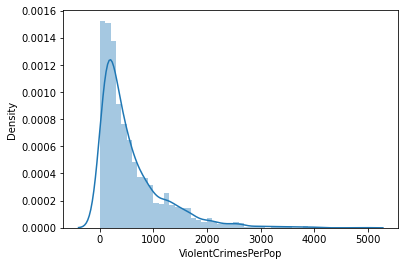

In [8]:
sns.distplot(crimedata['ViolentCrimesPerPop'])
plt.savefig('1-ViolentCrimeHist.png')

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



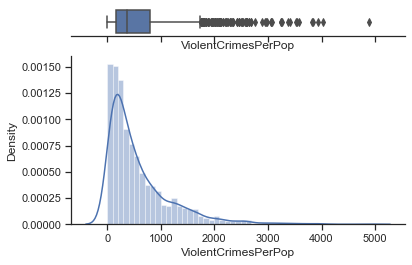

In [9]:
sns.set(style="ticks")

x = crimedata['ViolentCrimesPerPop']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.savefig('2-ViolentCrimeHist&Box.png')

In [10]:
#skewness and kurtosis
print("Skewness: %f" % crimedata['ViolentCrimesPerPop'].skew())
print("Kurtosis: %f" % crimedata['ViolentCrimesPerPop'].kurt())

Skewness: 2.103294
Kurtosis: 5.907320


In [11]:
crimedata['nonViolPerPop'].describe()

count     1900.000000
mean      4942.915568
std       2786.334619
min        116.790000
25%       2913.360000
50%       4479.660000
75%       6267.600000
max      27119.760000
Name: nonViolPerPop, dtype: float64

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



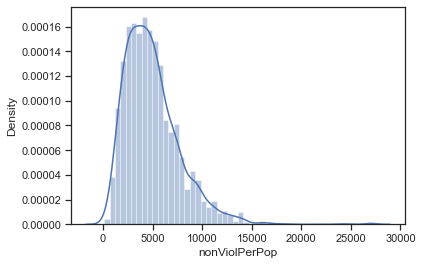

In [12]:
sns.distplot(crimedata['nonViolPerPop']);
plt.savefig('3-nonViol.png')

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



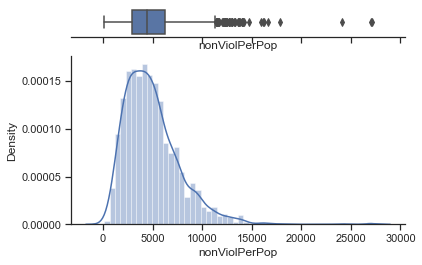

In [13]:
sns.set(style="ticks")

x = crimedata['nonViolPerPop']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.savefig('4-nonViolHist&Box.png')

In [14]:
#skewness and kurtosis
print("Skewness: %f" % crimedata['nonViolPerPop'].skew())
print("Kurtosis: %f" % crimedata['nonViolPerPop'].kurt())

Skewness: 1.588921
Kurtosis: 5.975694


Relationship with numerical variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


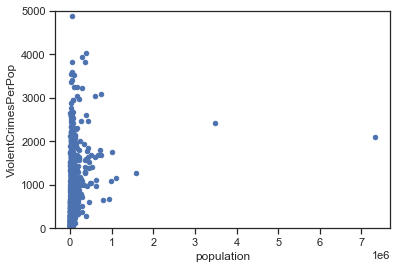

In [15]:
#scatter plot population/ViolentCrimesPerPop
var = 'population'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='ViolentCrimesPerPop', ylim=(0,5000));
plt.savefig('5-scatterViol&Pop.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


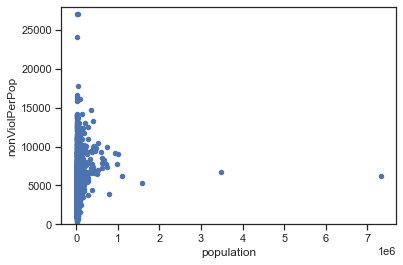

In [16]:
#scatter plot population/nonViolPerPop
var = 'population'
data = pd.concat([crimedata['nonViolPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='nonViolPerPop', ylim=(0,28000));
plt.savefig('6-scatternonViol&Pop.png')

In [17]:
crimedata['PopDens'].describe()

count     1900.000000
mean      2804.727842
std       2946.183413
min         10.000000
25%       1174.425000
50%       2003.750000
75%       3278.400000
max      44229.900000
Name: PopDens, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


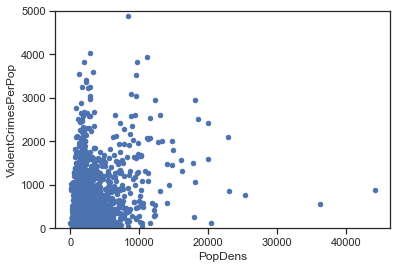

In [18]:
#scatter plot PopDens/ViolentCrimesPerPop
var = 'PopDens'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='ViolentCrimesPerPop', ylim=(0,5000));
plt.savefig('7-scatterViol&PopDens.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


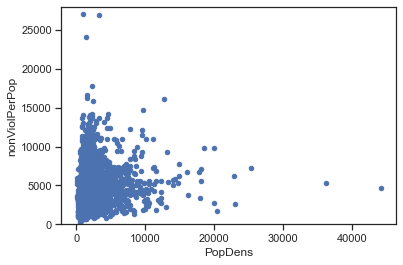

In [19]:
#scatter plot PopDens/nonViolPerPop
var = 'PopDens'
data = pd.concat([crimedata['nonViolPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='nonViolPerPop', ylim=(0,28000));
plt.savefig('8-scatternonViol&PopDens.png')

Relationship with categorical features

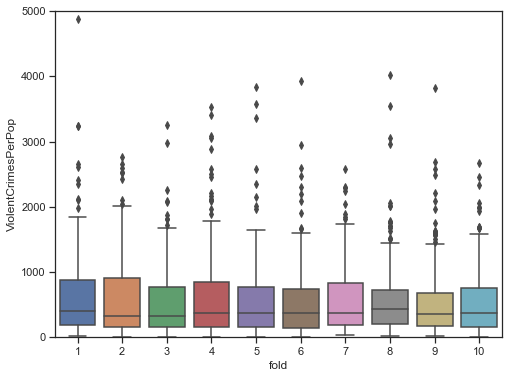

In [20]:
#box plot fold/ViolentCrimesPerPop
var = 'fold'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="ViolentCrimesPerPop", data=data)
fig.axis(ymin=0, ymax=5000);
plt.savefig('9-BoxFold&Viol.png')

Correlation matrix

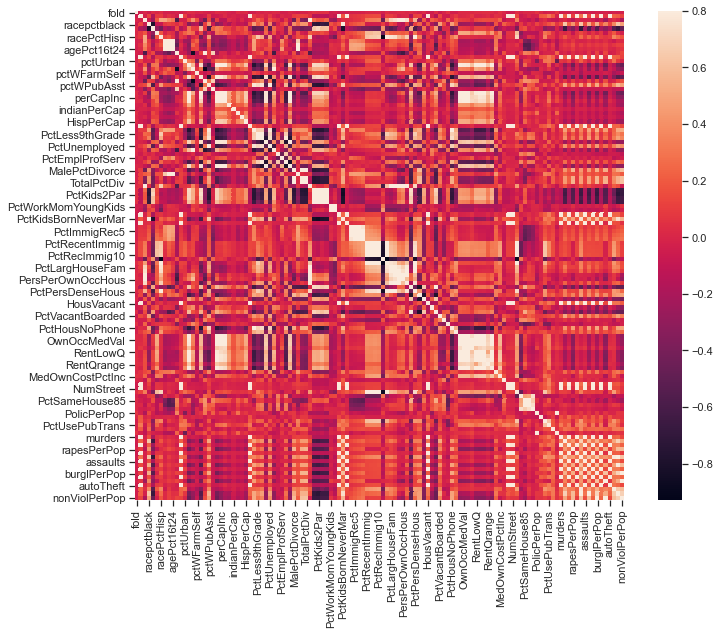

In [21]:
#correlation matrix
corrmat = crimedata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.savefig('10-CorrelationMatrix.png')

ViolentCrimesPerPop correlation matrix

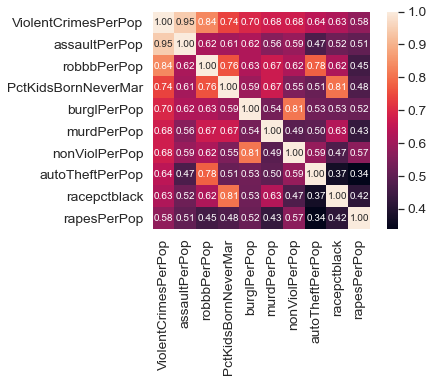

<Figure size 432x288 with 0 Axes>

In [22]:
#ViolentCrimesPerPop correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'ViolentCrimesPerPop')['ViolentCrimesPerPop'].index
cm = np.corrcoef(crimedata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig('11-ViolCorrelationMatrix.png')

nonViolPerPop correlation matrix

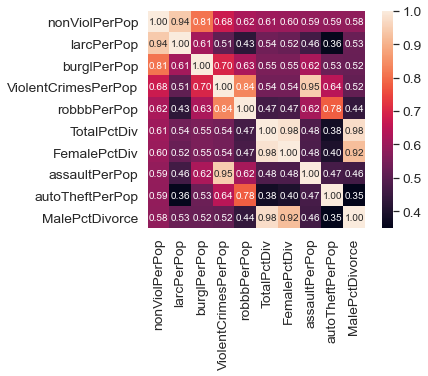

<Figure size 432x288 with 0 Axes>

In [23]:
#nonViolPerPop correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'nonViolPerPop')['nonViolPerPop'].index
cm = np.corrcoef(crimedata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig('12-nonViolCorrelationMatrix.png')

Scatter plots between 'ViolentCrimesPerPop' and correlated variables

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



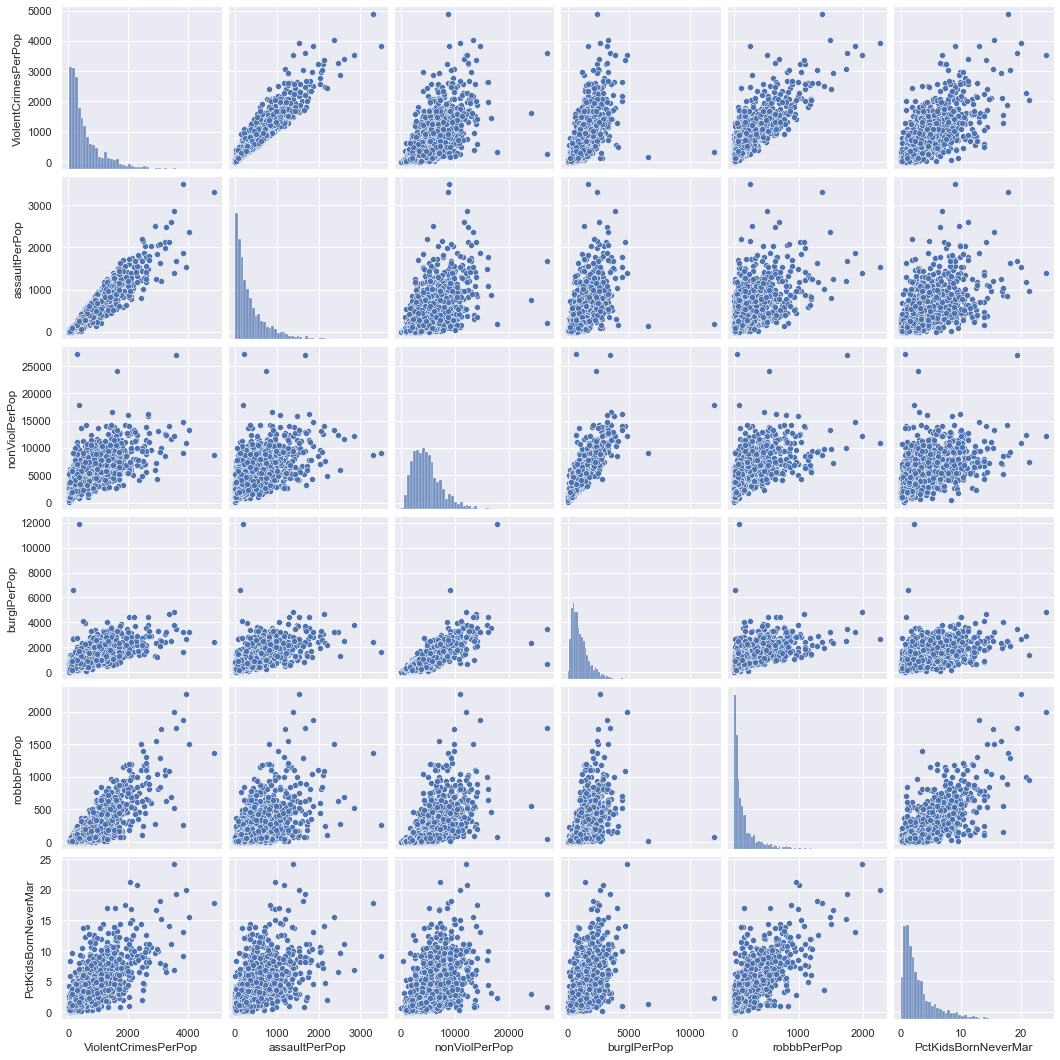

<Figure size 432x288 with 0 Axes>

In [24]:
#scatterplot
sns.set()
cols = ['ViolentCrimesPerPop', 'assaultPerPop', 'nonViolPerPop','burglPerPop','robbbPerPop','PctKidsBornNeverMar']
sns.pairplot(crimedata[cols], size = 2.5)
plt.show();
plt.savefig('13-scatterplotViol.png')

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



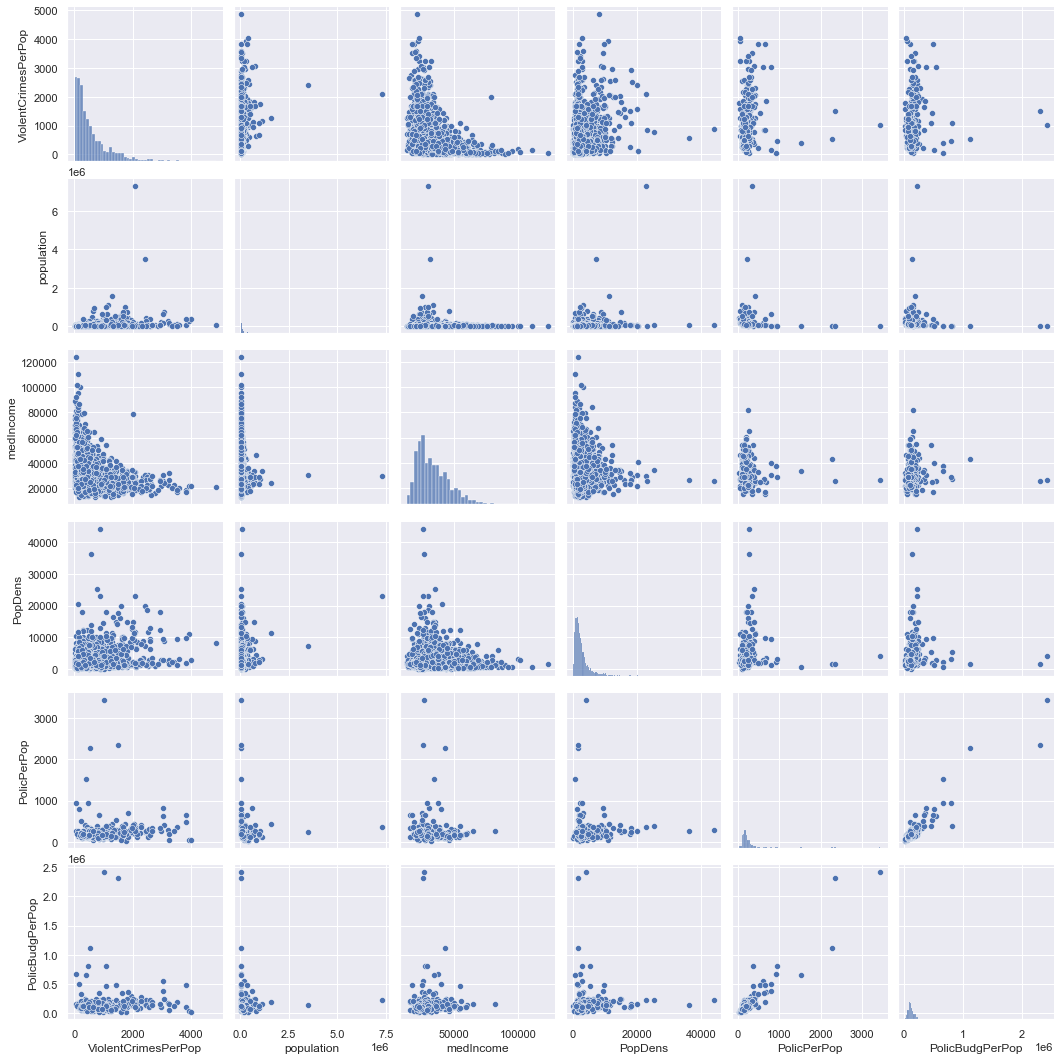

<Figure size 432x288 with 0 Axes>

In [25]:
#scatterplot
sns.set()
cols = ['ViolentCrimesPerPop', 'population', 'medIncome','PopDens','PolicPerPop','PolicBudgPerPop']
sns.pairplot(crimedata[cols], size = 2.5)
plt.show();
plt.savefig('14-scatterplotViolwithothervar.png')

Scatter plots between 'nonViolPerPop' and correlated variables

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



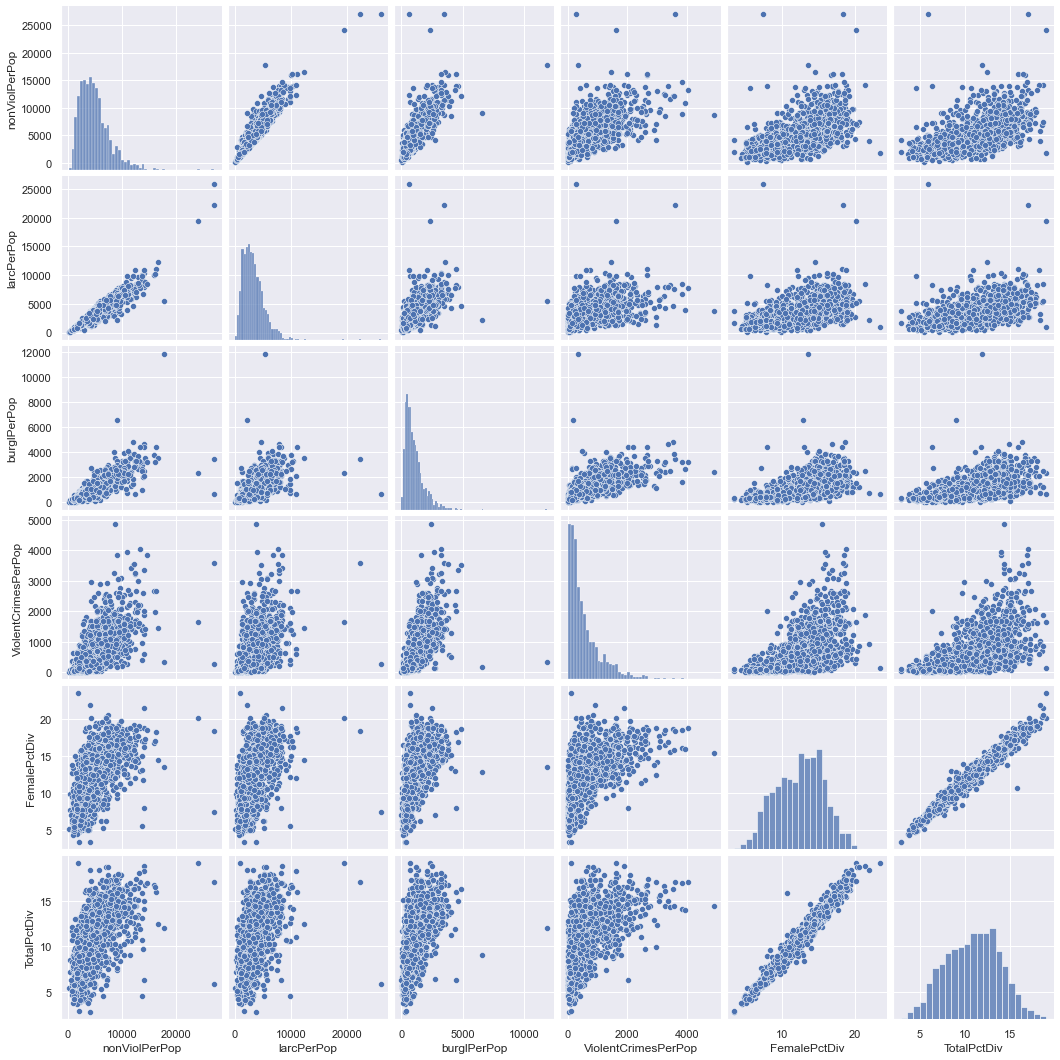

<Figure size 432x288 with 0 Axes>

In [26]:
#scatterplot
sns.set()
cols = ['nonViolPerPop', 'larcPerPop', 'burglPerPop','ViolentCrimesPerPop','FemalePctDiv','TotalPctDiv']
sns.pairplot(crimedata[cols], size = 2.5)
plt.show();
plt.savefig('15-scatterplotnonViol.png')

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



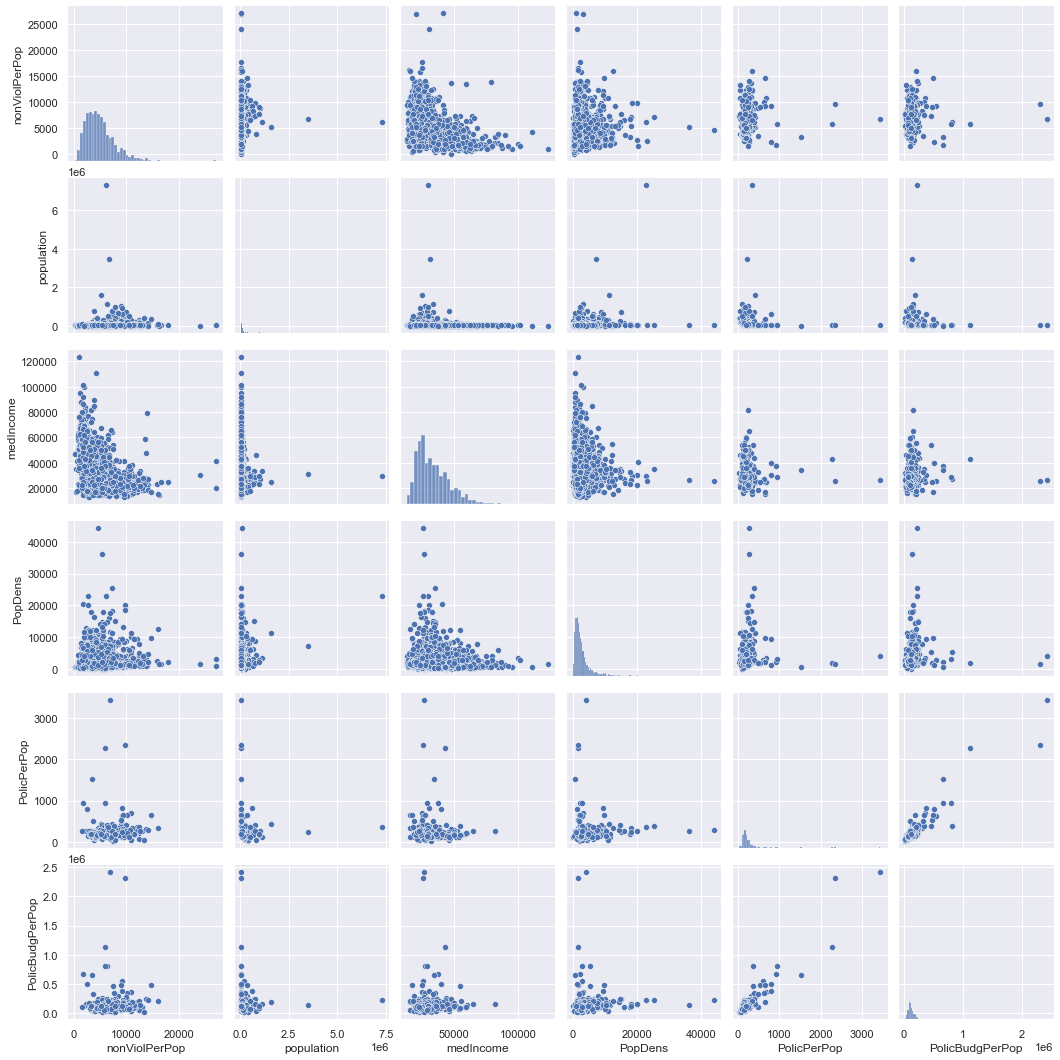

<Figure size 432x288 with 0 Axes>

In [27]:
#scatterplot
sns.set()
cols = ['nonViolPerPop', 'population', 'medIncome','PopDens','PolicPerPop','PolicBudgPerPop']
sns.pairplot(crimedata[cols], size = 2.5)
plt.show();
plt.savefig('16-scatterplotnonViolwithothervar.png')

Univariate analysis

In [28]:
#standardizing data
ViolentCrimesPerPop_scaled = StandardScaler().fit_transform(crimedata['ViolentCrimesPerPop'][:,np.newaxis]);
low_range = ViolentCrimesPerPop_scaled[ViolentCrimesPerPop_scaled[:,0].argsort()][:10]
high_range= ViolentCrimesPerPop_scaled[ViolentCrimesPerPop_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.94913034]
 [-0.94723984]
 [-0.9455466 ]
 [-0.94549728]
 [-0.94513562]
 [-0.94485615]
 [-0.94077924]
 [-0.93855995]
 [-0.93851063]
 [-0.93814897]]

outer range (high) of the distribution:
[[4.57159131]
 [4.6532283 ]
 [4.84426805]
 [4.86036201]
 [4.93090255]
 [5.3348626 ]
 [5.34290136]
 [5.49731461]
 [5.6593392 ]
 [7.05744244]]


<ipython-input-28-8c428326bb0d>:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [29]:
#standardizing data
nonViolPerPop_scaled = StandardScaler().fit_transform(crimedata['nonViolPerPop'][:,np.newaxis]);
low_range = nonViolPerPop_scaled[nonViolPerPop_scaled[:,0].argsort()][:10]
high_range= nonViolPerPop_scaled[nonViolPerPop_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.73252562]
 [-1.62328529]
 [-1.61155353]
 [-1.58915621]
 [-1.53187235]
 [-1.52437666]
 [-1.52324225]
 [-1.50481535]
 [-1.49603089]
 [-1.49142866]]

outer range (high) of the distribution:
[[3.32567138]
 [3.49521108]
 [3.9406553 ]
 [4.00245883]
 [4.05335269]
 [4.19486254]
 [4.63688201]
 [6.88305415]
 [7.92211528]
 [7.96124148]]


<ipython-input-29-5f30bb9c233a>:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Normality

The point here is to test 'ViolentCrimesPerPop' & 'nonViolPerPop' in a very lean way. We'll do this paying attention to:

Histogram - Kurtosis and skewness.

Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



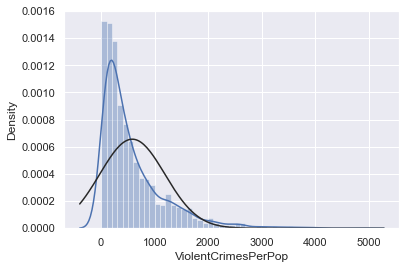

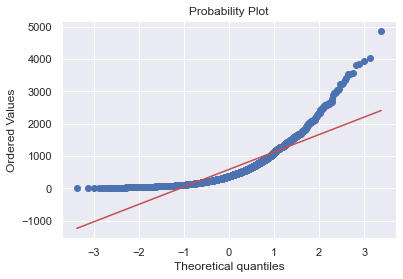

In [30]:
#histogram and normal probability plot
sns.distplot(crimedata['ViolentCrimesPerPop'], fit=norm);
fig = plt.figure()
res = stats.probplot(crimedata['ViolentCrimesPerPop'], plot=plt)
plt.savefig('17-ViolNorm_1.png')

In [31]:
#applying log transformation
crimedata['ViolentCrimesPerPop'] = np.log(crimedata['ViolentCrimesPerPop'])
crimedata['ViolentCrimesPerPop'].describe()

count    1900.000000
mean        5.853324
std         1.091612
min         1.893112
25%         5.107265
50%         5.911650
75%         6.675830
max         8.492298
Name: ViolentCrimesPerPop, dtype: float64

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



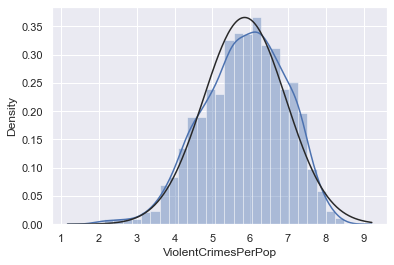

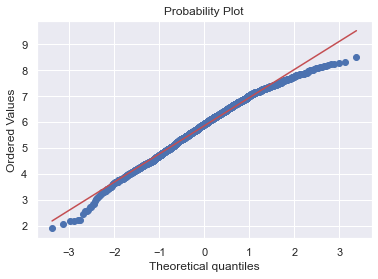

In [32]:
#transformed histogram and normal probability plot
sns.distplot(crimedata['ViolentCrimesPerPop'], fit=norm)
fig = plt.figure()
res = stats.probplot(crimedata['ViolentCrimesPerPop'], plot=plt)
plt.savefig('18-ViolNorm_2.png')

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



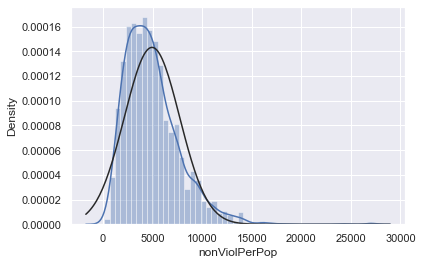

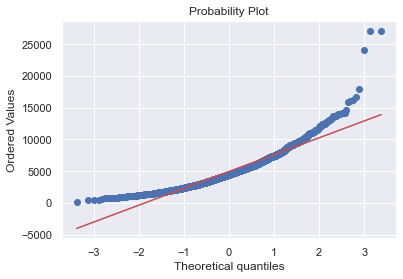

In [33]:
#histogram and normal probability plot
sns.distplot(crimedata['nonViolPerPop'], fit=norm);
fig = plt.figure()
res = stats.probplot(crimedata['nonViolPerPop'], plot=plt)
plt.savefig('19-nonViolNorm_1.png')

In [34]:
#applying log transformation
crimedata['nonViolPerPop'] = np.log(crimedata['nonViolPerPop'])
crimedata['nonViolPerPop'].describe()

count    1900.000000
mean        8.350073
std         0.580946
min         4.760377
25%         7.977062
50%         8.407302
75%         8.743149
max        10.208018
Name: nonViolPerPop, dtype: float64

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



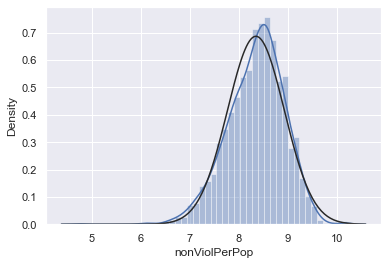

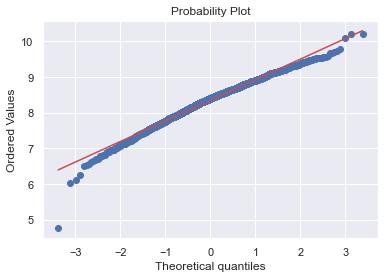

In [35]:
#transformed histogram and normal probability plot
sns.distplot(crimedata['nonViolPerPop'], fit=norm)
fig = plt.figure()
res = stats.probplot(crimedata['nonViolPerPop'], plot=plt)
plt.savefig('20-nonViolNorm_2.png')

Plot Map

In [36]:
#group Violent crime and nonViolent crime by state
crimedata_state = crimedata.groupby('state').agg({'ViolentCrimesPerPop':'mean','nonViolPerPop':'mean'})[['ViolentCrimesPerPop','nonViolPerPop']].reset_index()

##Aggregate view of Non-Violent Crimes by State
data1 = dict(type='choropleth',
        colorscale = 'ylgnbu',
        autocolorscale = False,
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['nonViolPerPop'].astype(float),
        colorbar = {'title':'non-Violent Crimes Per-100K'}
        )
layout1 = dict(
        title = 'non-Violent Crimes Per 100K Population',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(0,0,0)'),
             )
    
fig1 = go.Figure(data = [data1],layout = layout1)
iplot(fig1,validate=False)
plt.savefig('21-Map_1.png')

<Figure size 432x288 with 0 Axes>

In [37]:
##Aggregate view of Violent Crimes by state
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "ylgnbu",
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['ViolentCrimesPerPop'].astype(float),
        colorbar = {'title':'Violent Crimes Per 100K'}
        )
layout2 = dict(
        title = 'Violent Crimes Per 100K Population across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0,0,0)'),
             )
    
fig2 = go.Figure(data = [data2],layout = layout2)
iplot(fig2,validate=False)
plt.savefig('22-Map_1.png')

<Figure size 432x288 with 0 Axes>

In [38]:
## Check if there is multicollinearity between any of the explanatory variables under study
cols = ['HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','PctUnemployed','PctEmploy','murdPerPop','rapesPerPop','robbbPerPop','assaultPerPop','ViolentCrimesPerPop','burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']
crimedata_study = crimedata.filter(cols, axis=1)
corr_crimedata_study = crimedata_study.corr()
iv_corr = corr_crimedata_study.iloc[:-10,:-10]
multicol_limit = 0.3
iv_corr = (iv_corr[abs(iv_corr) > multicol_limit][iv_corr != 1.0]).unstack().to_dict()
iv_multicoll_corr = pd.DataFrame(list(set([(tuple(sorted(key)), iv_corr[key]) for key in iv_corr])), 
        columns=['Independent Variables', 'Correlation Coefficient'])
print (iv_multicoll_corr[iv_multicoll_corr.notnull().all(axis=1)])

                 Independent Variables  Correlation Coefficient
3       (PctHousOwnOcc, PctUnemployed)                -0.394017
6   (PctVacMore6Mos, PctVacantBoarded)                 0.349288
15   (PctUnemployed, PctVacantBoarded)                 0.480908
